# Librairies

In [1]:
# Librairies classiques
import pandas as pd
from pandas import DataFrame
import numpy as np
import sklearn
import timeit
import sklearn
import os

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.cm as cm
from glob import glob

# Computer Vision
import cv2
import PIL

# Standardisation
from sklearn.preprocessing import StandardScaler

# ML/Clustering/PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Erreur et qualité des prédictions
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples

# Deep Learning / Transfer Learning
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import Sequential, optimizers

# Réglagles

In [2]:
# Affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# Format
sns.set(rc={'figure.figsize':(16,9)})
pd.options.display.max_columns = 50

# Style
sns.set_style('darkgrid')
plt.style.use('ggplot')

# Chargement du dataset et des images

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data_produits.csv", sep = ",")

In [4]:
df.head()

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_category,product_category2,description_bow,description_bow_lem,description_dl
0,0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}",Home Furnishing,Curtains & Accessories,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multicolor dimensions length 213 box number contents sales package pack sales package curtains body design material polyester,key feature elegance polyester 

In [5]:
df["product_category"].value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: product_category, dtype: int64

In [6]:
def reduce_space(a):

   # Cette fonction retire le dernier caractère du str en entrée
    
    size = len(a)
    
    return a[:size-1]    

In [7]:
# Enlève un espace dans les str de la colonne product_category
df['product_category'] = df['product_category'].apply(lambda x:reduce_space(x))

In [8]:
images = glob("/content/drive/MyDrive/Projets Data/Images/*")

# Affichage des images

In [9]:
img_mpl = plt.imread(images[900])

In [10]:
img_mpl.shape

(1754, 2768, 3)

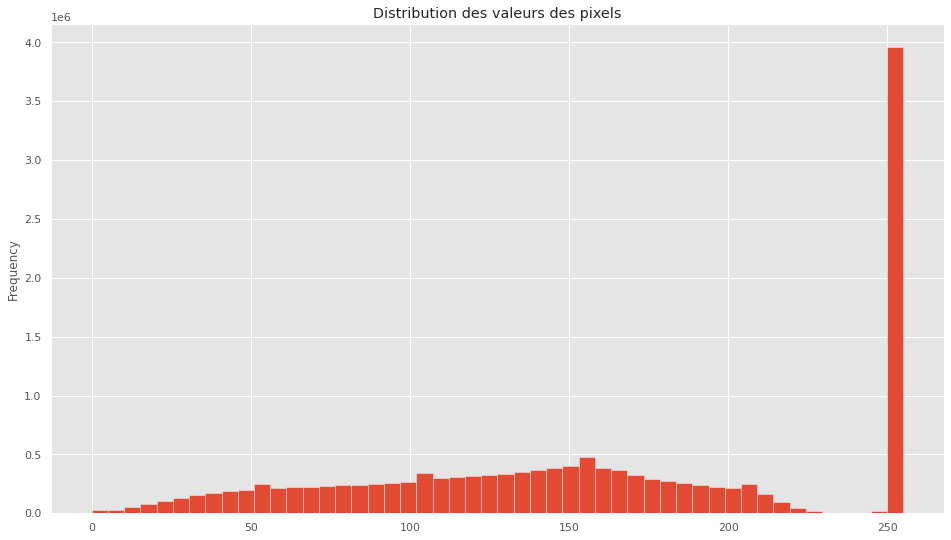

In [11]:
pd.Series(img_mpl.flatten()).plot(kind="hist",
                                 bins=50,
                                 title="Distribution des valeurs des pixels")
plt.show()

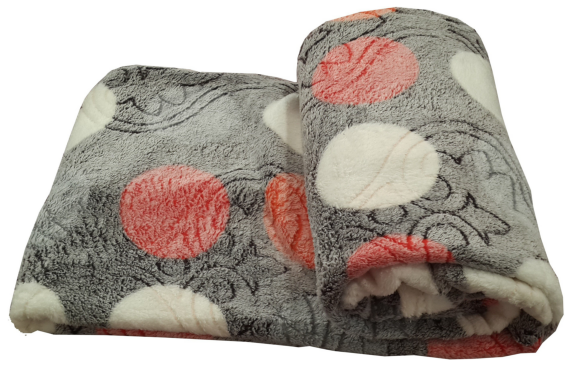

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis("off")
plt.show()

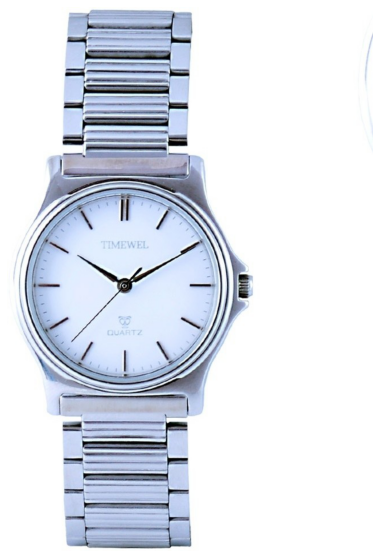

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(images[500]))
ax.axis("off")
plt.show()

# Application des filtres

In [14]:
from google.colab.patches import cv2_imshow

In [15]:
# Path du dossier
folder = "/content/drive/MyDrive/Projets Data/Images"

# Liste contenant les images du dataset
images = []

# Chargement des images en noir & blanc
for filename in os.listdir(folder):
    
    # Path du fichier
    path = folder + '/' + filename
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    
    # Filtrage Median
    img_filtre1 = cv2.medianBlur(img, 3)

    # Filtrage Gaussien
    img_filtre2 = cv2.GaussianBlur(img_filtre1, (5, 5), 1)
    
    # Ajout de l'image filtrée à la liste des images
    images.append(img_filtre2)

In [16]:
len(images)

1050

In [17]:
# Affichage de quelques images
for i in range(60,70) :
  cv2_imshow(images[i])

Output hidden; open in https://colab.research.google.com to view.

In [18]:
img_name = []

for j in os.listdir(folder):
    img_name.append(j)
    
df_image_order = pd.DataFrame(img_name)
df_image_order.columns = ['image']

In [19]:
# Dataframe trié par ordre des images
df_product_merged = pd.merge(df_image_order, df, left_on = 'image', right_on = 'image')
df_product_merged2 = pd.merge(df_image_order, df, left_on = 'image', right_on = 'image')

# Exemple

In [20]:
img = cv2.imread('/content/drive/MyDrive/cute-young-cat2.jpg', cv2.IMREAD_GRAYSCALE)

In [21]:
img.shape

(243, 480)

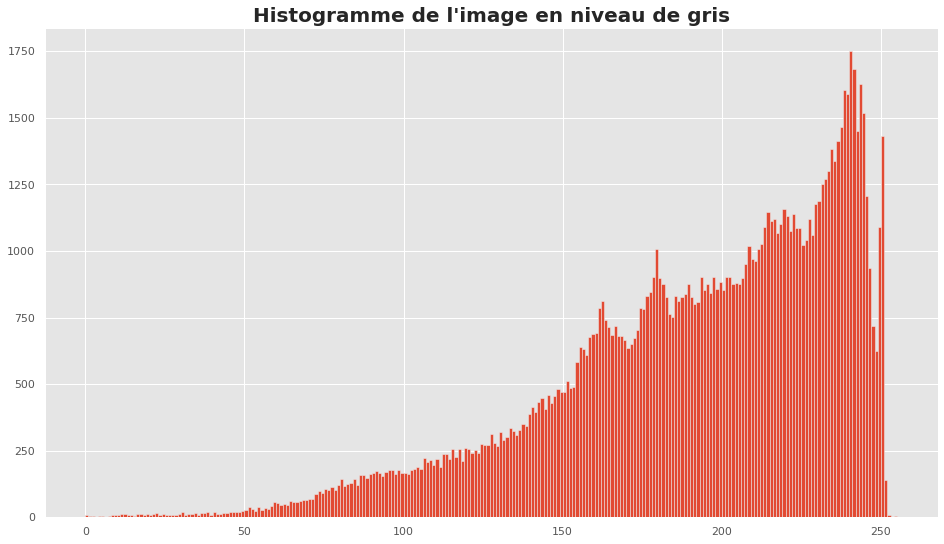

In [22]:
plt.figure(figsize=(16,9))
plt.title("Histogramme de l'image en niveau de gris", weight='bold', size=20)
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

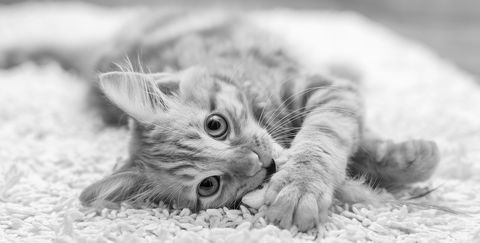

In [23]:
# Affichage de l'image (sans filtrage)
cv2_imshow(img)

In [24]:
# Filtrage Median.
img_filtre1 = cv2.medianBlur(img, 3)

# Filtrage Gaussien.
img_filtre2 = cv2.GaussianBlur(img_filtre1, (5, 5), 1)

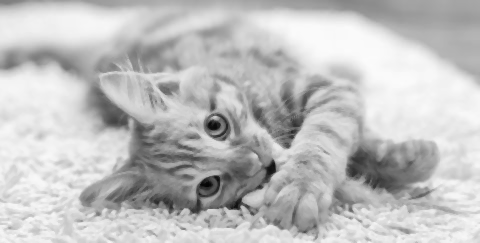

In [25]:
# Affichage de l'image (filtrage 1)
cv2_imshow(img_filtre1)

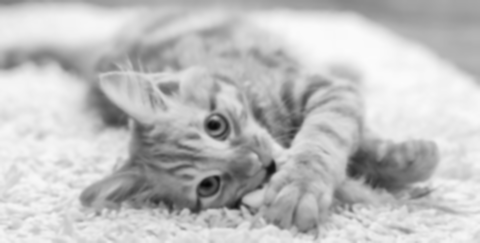

In [26]:
# Affichage de l'image (filtrage 2)
cv2_imshow(img_filtre2)

In [27]:
def keypoints(image, extractor):
    
    # Cette fonction retourne les keypoints de l'image donnée en entrée
    
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints

In [28]:
# ORB
extractor = cv2.ORB_create(nfeatures=1000)

img_1 = cv2.drawKeypoints(img_filtre2, keypoints(img_filtre2, extractor), None, color=(0,255,0), flags=0)

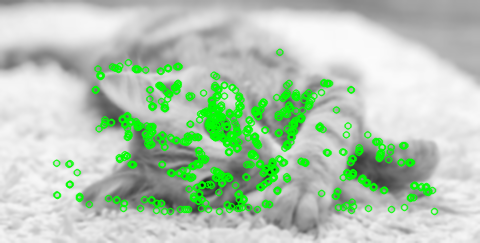

In [29]:
# Affichage de l'image après filtrage
cv2_imshow(img_1)

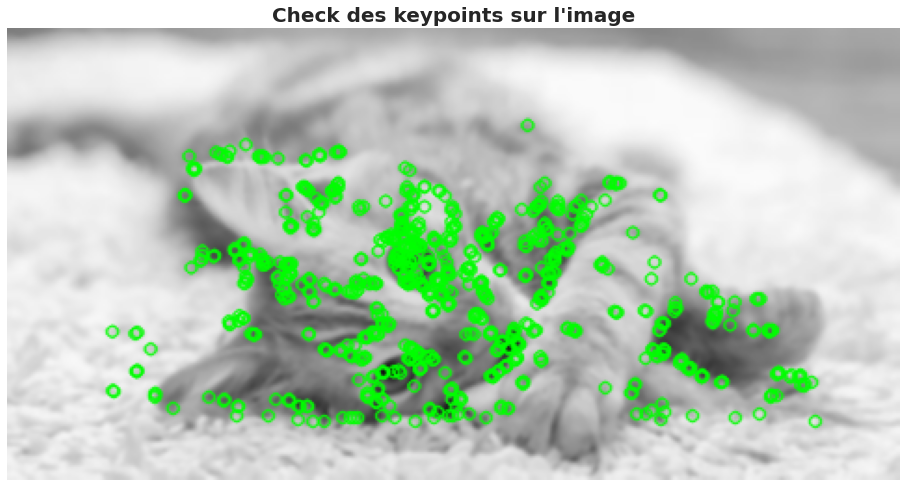

In [30]:
# Affichage de l'image avec ses keypoints
plt.title("Check des keypoints sur l'image", weight='bold', size=20)
plt.axis("off")
plt.imshow(img_1)

# Bag of visual words

In [31]:
def orb_features(img):
    
   # Cette fonction retourne la liste des descripteurs pour chaque image

    
    # Liste contenant les descripteurs
    descriptor = []
    
    # Extraction des descripteurs par ORB (ici 50 descripteurs)
    orb_extractor = cv2.ORB_create(nfeatures=50)
    
    for i in img:
            
        # Keypoints & Descripteurs
        kp, des = orb_extractor.detectAndCompute(i,None)
        descriptor.append(des)
    
    return descriptor

In [32]:
# Liste des descripteurs de l'ensemble des images
descriptor_list = orb_features(images)

In [33]:
columns_name = [str(i) for i in range(32)]
columns_name.append('img')

In [34]:
# Réorganisation des descripteurs de chaques images du dataset

df_courant1 = pd.DataFrame(columns=np.arange(33))
df_courant1.columns = columns_name

# Liste stockant les index des potentiels images sans descripteurs
img_without_descriptor = []

for i,j in enumerate(descriptor_list):
    
    df_courant2 = pd.DataFrame(j)
    
    if df_courant2.shape[0]!=0:
    
        df_courant3 = pd.concat([df_courant2, pd.Series(np.full(df_courant2.shape[0],i))], axis=1)
        df_courant3.columns = columns_name

        df_courant1 = pd.concat([df_courant1, df_courant3])
    
    else:
        img_without_descriptor.append(i)

In [35]:
# Index des images n'ayant pas de descripteurs trouvés par ORB
img_without_descriptor

[291, 300, 675, 843]

In [36]:
# Standardisation avant clustering
S = StandardScaler()
descriptors_standard = S.fit_transform(df_courant1.iloc[:,np.arange(32)])

In [37]:
# Création des visual words via KMeans
kmeans = KMeans(n_clusters = 750, init='k-means++')
kmeans.fit(descriptors_standard)

KMeans(n_clusters=750)

In [38]:
df_courant1['Labels'] = kmeans.labels_

In [39]:
def complete_list(L):
    
  # Cette fonction complete une liste donnée en entrée avec des 0 jusqu'à avoir k éléments dans la liste
    
    L = list(L)
    
    while len(L)<750:
        L.append(0)
        
    return L

In [40]:
# Liste contenant le Bag of Visual Word
bovw = []

# Création des vecteurs Bovw pour chaque image
for i in df_courant1['img'].unique():
    bovw.append(complete_list(np.bincount(df_courant1[df_courant1['img']==i]['Labels'])))

In [41]:
df_visual_word = pd.DataFrame(bovw)

# Standardisation
S = StandardScaler()
df_visual_word = pd.DataFrame(S.fit_transform(df_visual_word))

In [42]:
# PCA

composantes = []
for i in range(df_visual_word.shape[1]):
    composantes.append('Principal component ' + str(i))


pca = PCA(n_components=df_visual_word.shape[1])
df_visual_word_pca = pd.DataFrame(pca.fit_transform(df_visual_word))
df_visual_word_pca.columns = composantes

In [43]:
# Combien doit-on garder de composantes principales pour expliquer 95% de la variance du dataset ?

for i,j in enumerate(pca.explained_variance_ratio_.cumsum()):
    if(j>0.95):
        print('Il faut {} composantes pour expliquer 95% de la variance du dataset'.format(i))
        break

Il faut 511 composantes pour expliquer 95% de la variance du dataset


In [44]:
# Réduction au nbr de composantes nécessaires
df_visual_word_pca = df_visual_word_pca.iloc[:,np.arange(511)]

# Destruction des lignes ou les produits n'ont pas de descripteur
df_product_merged.drop(index = img_without_descriptor, inplace = True)
df_product_merged.reset_index(inplace=True, drop=True)

# Ajout de la target : product_category
df_visual_word_pca['Category'] = df_product_merged['product_category']

# Algorithme supervisé (test)

In [45]:
# Split en training/testing set
X_train, X_test, Y_train, Y_test = train_test_split(df_visual_word_pca.iloc[:,:df_visual_word_pca.shape[1] - 1], 
                                                    df_visual_word_pca['Category'], 
                                                    test_size=0.3)

In [46]:
# GridSearch sur la RF
RForestClassifier = RandomForestClassifier()
gridSearch = GridSearchCV(RForestClassifier, {'max_depth': range(3,6),
                                              'n_estimators': (200,300,500)},
                                              cv=5,
                                              scoring='accuracy')
# Fit sur le training set
gridSearch.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 6),
                         'n_estimators': (200, 300, 500)},
             scoring='accuracy')

In [47]:
# Accuracy sur l'approche supervisée
prediction = gridSearch.best_estimator_.predict(X_test)
accuracy_score(Y_test, prediction)

0.20382165605095542

# Matrice de confusion

In [48]:
categ_unique = df.product_category.unique()

df_real_label_ytest = pd.DataFrame(Y_test)
df_prediction = pd.DataFrame(gridSearch.best_estimator_.predict(X_test))

df_real_label_ytest.reset_index(inplace = True, drop = True)

df_compare = pd.concat([df_real_label_ytest, df_prediction], axis=1)
df_compare.columns = ['product_category', 'prediction']

In [49]:
def dico_to_list(dico):
    
   # Cette fonction retourne les valeurs d'un dictionnaire sous forme d'une liste
    
    L=[]
    for key, value in dico.items():
        L.append(value)
    return L

In [50]:
# Création de la matrice de confusion

df_matrice_confusion = pd.DataFrame(columns=categ_unique,index=categ_unique)

for i in categ_unique:
    
    dico ={j:0 for j in categ_unique}
    
    mask = (df_compare['product_category']==i)
    mask2 = (df_compare['product_category']!=df_compare['prediction'])
    
    dico[i] = df_compare[mask].shape[0] - df_compare[mask & mask2].shape[0]
    
    for k in df_compare[mask & mask2].prediction:
        dico[k]+=1
    
    df_matrice_confusion.loc[i,:] = dico_to_list(dico)

df_matrice_confusion = df_matrice_confusion[df_matrice_confusion.columns].astype(float)

Text(0.5, 84.5, 'Prediction')

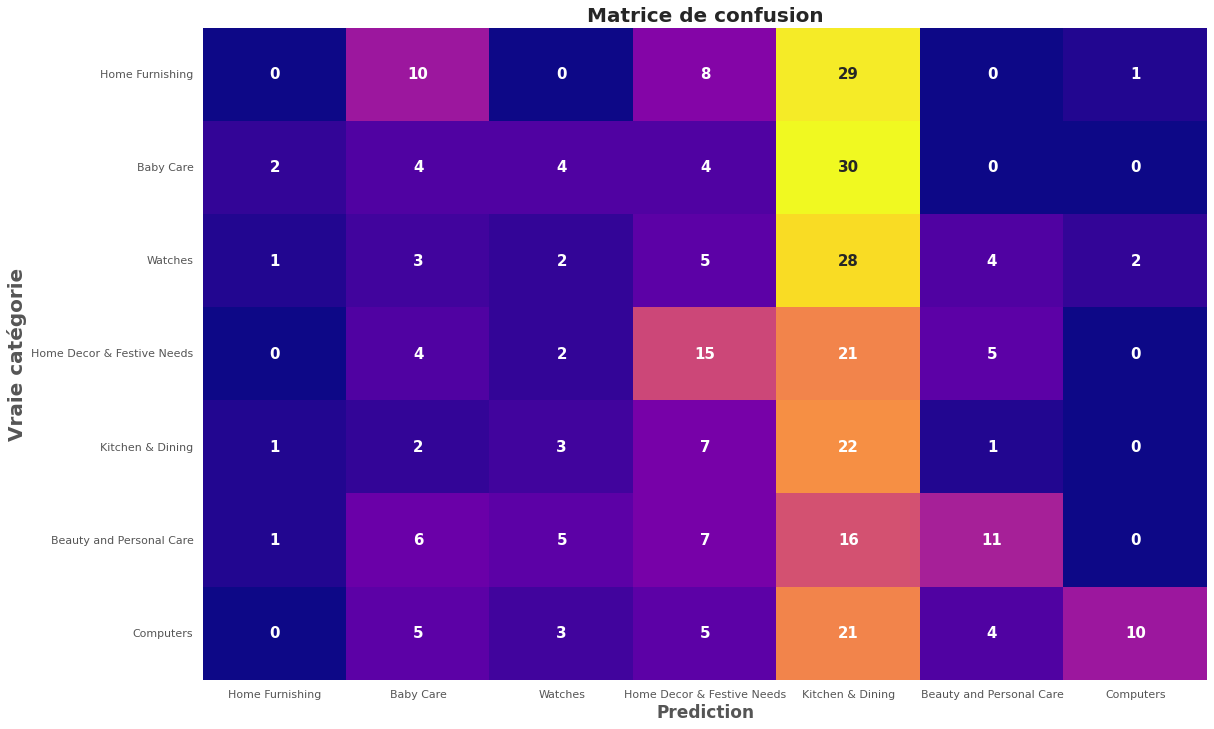

In [51]:
plt.figure(figsize=(18,12))
plt.title('Matrice de confusion', size=20, weight='bold')
sns.heatmap(df_matrice_confusion,
            xticklabels=True, 
            yticklabels= True, 
            annot=True,
            cmap="plasma", cbar=False,
            annot_kws={"size": 15, 'weight' : 'bold'})
plt.ylabel("Vraie catégorie", weight='bold', size=20)
plt.xlabel('Prediction', weight='bold', size=17)

# K-Means Clustering

In [52]:
km = KMeans(n_clusters=7, 
            init='k-means++',
            random_state=2)

km.fit(df_visual_word_pca.iloc[:,np.arange(df_visual_word_pca.shape[1]-1)])

KMeans(n_clusters=7, random_state=2)

In [53]:
df_visual_word_pca['Labels'] = km.labels_
df_visual_word_pca.groupby('Labels').size()

Labels
0    224
1     42
2    249
3    354
4      7
5      3
6    167
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Visualisation PCA avec Kmeans')

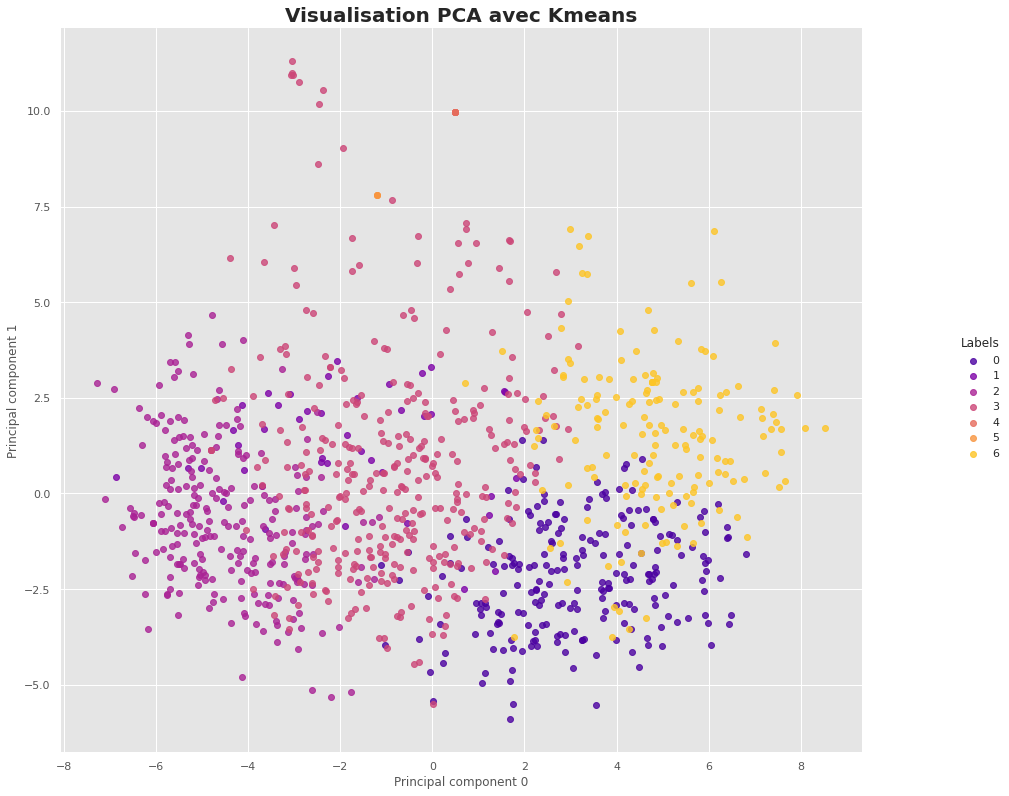

In [54]:
sns.lmplot(x='Principal component 0', 
            y='Principal component 1', 
            hue='Labels', 
            data=df_visual_word_pca,
            palette = 'plasma',
            fit_reg=False,
            legend=True, 
            legend_out=True)

plt.gcf().set_size_inches(16, 12)
plt.title('Visualisation PCA avec Kmeans',size=20, weight='bold')

In [55]:
# Calcul des composantes TSNE
tsne = TSNE(n_components=2, perplexity=50)
tsne_results = tsne.fit_transform(df_visual_word_pca.iloc[:,:511])

df_visual_word_pca['TSNE_2D_one'] = tsne_results[:,0]
df_visual_word_pca['TSNE_2D_two'] = tsne_results[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Visualisation PCA + T-Sne')

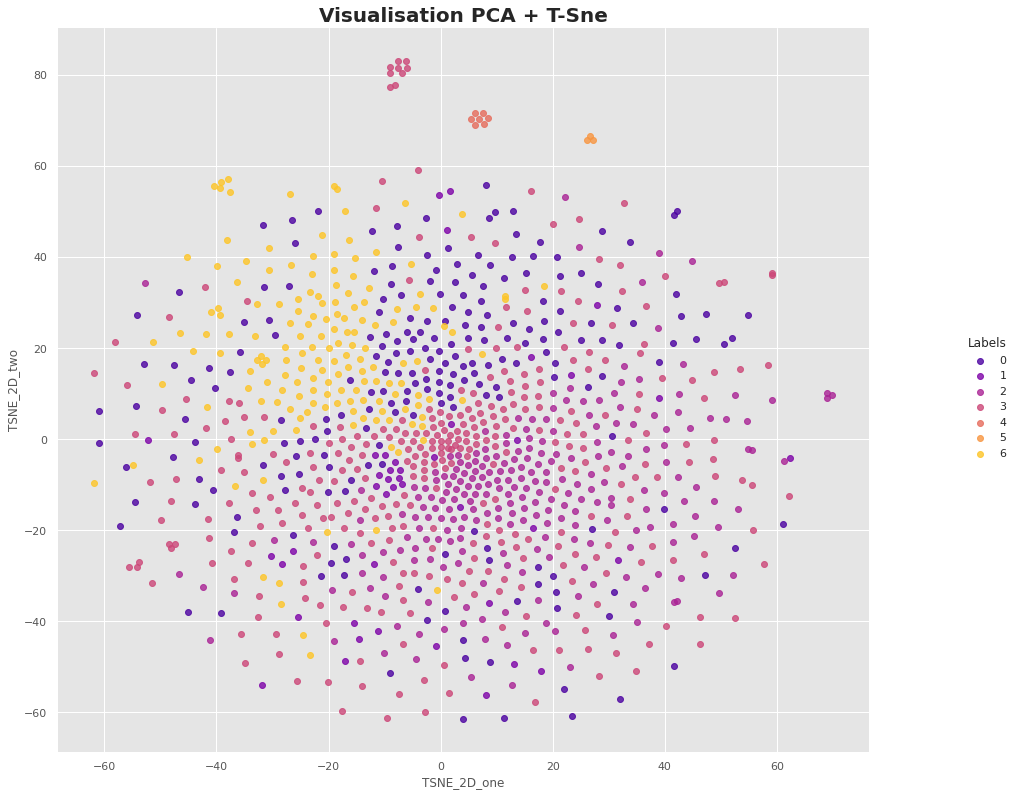

In [56]:
sns.lmplot(x='TSNE_2D_one', 
           y='TSNE_2D_two', 
           hue='Labels', 
           data=df_visual_word_pca,
           palette = 'plasma',
           fit_reg=False,
           legend=True, 
           legend_out=True)

plt.gcf().set_size_inches(16, 12)
plt.title('Visualisation PCA + T-Sne',size=20, weight='bold')

## Qualité du clustering

In [57]:
# Indice de Rand ajusté
adjusted_rand_score(df_visual_word_pca.Labels, df_visual_word_pca.Category)

0.021563070056392068

In [58]:
# Coefficient de silhouette moyen
silhouette_score(df_visual_word_pca.iloc[:,:511], df_visual_word_pca.Labels)

0.01531571251768669

# Transfer Learning

## Training set / Validation set

In [ ]:
def write_image_in_good_set(L1, L2, set_type):
    
    # Cette fonction charge dans le bon dossier les images associées au set spécifié (Training, Validation, Testing)
    # Ce format est nécessaire pour l'utilisation du data_generator que nous utiliserons ensuite
    
    c = 0 
    
    for i,j in zip(L1,L2):
        
        c+=1
        
        # Lecture de l'image
        img = cv2.imread('/content/drive/MyDrive/Projets Data/Images/{}'.format(i))
        
        # Ecriture de l'image dans le dossier à la classe correspondante
        cv2.imwrite('/content/drive/MyDrive/Projets Data/Projet 6/{0}/{1}/im{2}.jpg'.format(set_type, j, c), img)

In [ ]:
# Split en training/testing set
X_train, X_test, Y_train, Y_test = train_test_split(df.image, 
                                                    df.product_category, 
                                                    test_size=0.25)

# Split en training/validation set
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train,
                                                                Y_train,
                                                                test_size=0.25)


# Writting the image of the training set
write_image_in_good_set(X_train, Y_train, 'Training set')

# Writting images in the validation set
write_image_in_good_set(X_validation, Y_validation, 'Validation set')

# Writting images in the testing set
write_image_in_good_set(X_test, Y_test, 'Testing set')

In [ ]:
# Path du dossier
folder = "/content/drive/MyDrive/Projets Data/Projet 6/Testing set"

i = 0

# Liste contenant les catégories des images chargées
categ = []

for j in os.listdir(folder):
    
    folder_courant = folder + '/' + j
    
    for filename in os.listdir(folder_courant):
        
        categ.append(j)

        # Path du fichier
        path = folder_courant + '/' + filename

        # Charger l'image à la bonne dimension
        img_resize = load_img(path, target_size=(224, 224))

        # Transformation de l'image en tableau numpy
        img = img_to_array(img_resize)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

        # Preprocessing
        img = preprocess_input(img)

        # Ajout de l'image à la liste de stockage
        if (i==0) :
            x1 = img
            i = 1
        else :
            x1 = np.concatenate((x1,img),axis=0)

## VGG16

In [ ]:
# Chargement de VGG16 sans les couches hautes (fully connected)
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

x = model.output

# Ajout d'une couche Flatten pour réduire les dimensions de l'input
x = Flatten()(x)

# Ajout de la couche Dense de prédiction adaptée à notre problème de classifications (7 classes)
predictions = Dense(7, activation='softmax')(x)

In [ ]:
# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

In [ ]:
# On n'entraine pas les couches les plus basses du réseau (les 10 + profondes)
for layer in new_model.layers[:10]:
    layer.trainable=False
    
# On entraine les couches hautes du réseau ainsi que le classifieur
for layer in new_model.layers[10:]:
    layer.trainable=True

In [ ]:
# Architecture du réseau
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Chargement du training set via data_generator
train_generator = data_generator.flow_from_directory(
    r'/content/drive/MyDrive/Projets Data/Projet 6/Training set',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 590 images belonging to 7 classes.


In [ ]:
# Chargement du validation set via data_generator
validation_generator = data_generator.flow_from_directory(
    r'/content/drive/MyDrive/Projets Data/Projet 6/Validation set',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 197 images belonging to 7 classes.


In [ ]:
# Compilation du modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

# Entraînement du modèle via le train_generator
# On fait attention à l'overfitting en utilisant notre validation set
new_model.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=5,
                    verbose=1, 
                    validation_data=validation_generator,
                    validation_steps=15)

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 0.4419 - accuracy: 0.8700 

5/5 [==============================] - 242s 55s/step - loss: 0.4419 - accuracy: 0.8700 - val_loss: 1.1592 - val_accuracy: 0.6345
Epoch 2/5
5/5 [==============================] - 101s 20s/step - loss: 0.3946 - accuracy: 0.8700
Epoch 3/5
5/5 [==============================] - 102s 20s/step - loss: 0.2678 - accuracy: 0.9200
Epoch 4/5
5/5 [==============================] - 101s 20s/step - loss: 0.4137 - accuracy: 0.8800
Epoch 5/5
5/5 [==============================] - 89s 17s/step - loss: 0.3022 - accuracy: 0.9000


In [ ]:
# Prediction sur les testing Set
pred = new_model.predict(x1, verbose=1)

9/9 [==============================] - 128s 14s/step


In [ ]:
dico_categ = {'0':'Baby Care',
             '1':'Beauty and Personal Care',
             '2':'Computers',
             '3':'Home Decor & Festive Needs',
             '4':'Home Furnishing',
             '5':'Kitchen & Dining',
             '6':'Watches'}

pred2 = []
for i in pred:
    i_list = list(i)
    pred2.append(dico_categ[str(i_list.index(max(i_list)))])

In [ ]:
# Accuracy_score
accuracy_score(categ,pred2)

0.7262357414448669

In [ ]:
# Precision_score
precision_score(categ, pred2, average='weighted')

0.735272545243469

In [ ]:
categ_unique2 = list(categ_unique)
categ_unique2.append('Accuracy %')

df_real_label_ytest = pd.DataFrame(categ)
df_prediction = pd.DataFrame(pred2)

df_real_label_ytest.reset_index(inplace = True, drop = True)

df_compare = pd.concat([df_real_label_ytest, df_prediction], axis=1)
df_compare.columns = ['product_category', 'prediction']

In [ ]:
# Création de la matrice de confusion

df_matrice_confusion = pd.DataFrame(columns=categ_unique2,index=categ_unique)

for i in categ_unique:
    
    dico ={j:0 for j in categ_unique}
    
    mask = (df_compare['product_category']==i)
    mask2 = (df_compare['product_category']!=df_compare['prediction'])
    
    dico[i] = df_compare[mask].shape[0] - df_compare[mask & mask2].shape[0]
    
    for k in df_compare[mask & mask2].prediction:
        dico[k]+=1
    
    # Transformation en liste du dictionnaire
    list_check_error = dico_to_list(dico)
    
    # Check de l'accuracy sur la catégorie produit en cours
    list_check_error.append(accuracy_score(df_compare[mask].product_category,
                                           df_compare[mask].prediction)*100)
    
    df_matrice_confusion.loc[i,:] = list_check_error

df_matrice_confusion = df_matrice_confusion[df_matrice_confusion.columns].astype(float)

Text(0.5, 84.5, 'Prediction')

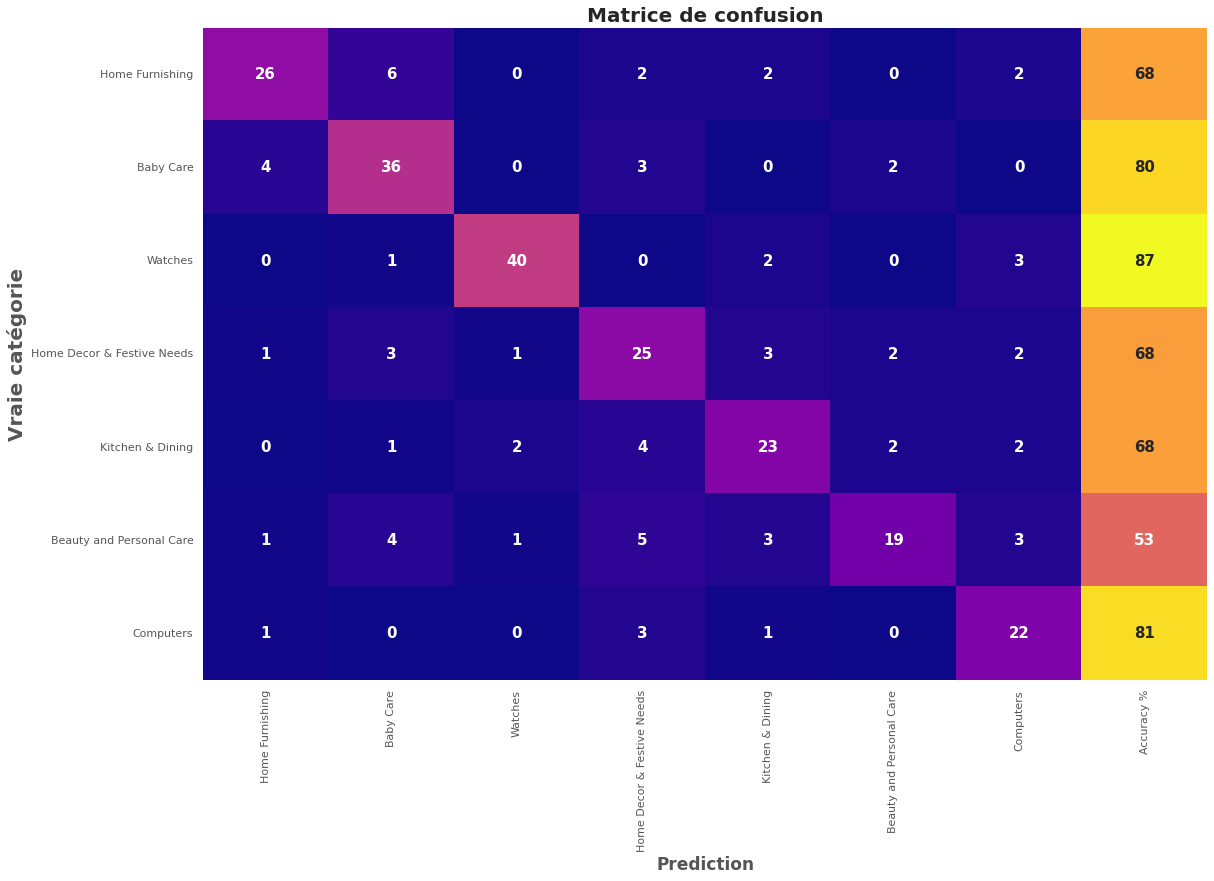

In [ ]:
plt.figure(figsize=(18,12))
plt.title('Matrice de confusion', size=20, weight='bold')
sns.heatmap(df_matrice_confusion,
            xticklabels=True, 
            yticklabels= True, 
            annot=True,
            cmap="plasma", cbar=False,
            annot_kws={"size": 15, 'weight' : 'bold'})
plt.ylabel("Vraie catégorie", weight='bold', size=20)
plt.xlabel('Prediction', weight='bold', size=17)

## ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
# Chargement de ResNet50 sans les couches hautes (fully connected)
model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

x = model.output

# Ajout d'une couche Flatten pour réduire les dimensions de l'input
x = Flatten()(x)

# Ajout de la couche Dense de prédiciton adaptée à notre problème de classifications (7 classes)
predictions = Dense(7, activation='softmax')(x)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

In [ ]:
# On n'entraine pas les couches les plus basses du réseau (les 10 + profondes)
for layer in new_model.layers[:10]:
    layer.trainable=False
    
# On entraine les couches hautes du réseau ainsi que le classifieur
for layer in new_model.layers[10:]:
    layer.trainable=True

In [ ]:
# Architecture du réseau
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
# Chargement du training set via data_generator
train_generator = data_generator.flow_from_directory(
    r'/content/drive/MyDrive/Projets Data/Projet 6/Training set',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 1092 images belonging to 7 classes.


In [ ]:
# Chargement du validation set via data_generator
validation_generator = data_generator.flow_from_directory(
    r'/content/drive/MyDrive/Projets Data/Projet 6/Validation set',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 362 images belonging to 7 classes.


In [ ]:
# Compilation du modèle 
new_model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

# Entraînement du modèle via le train_generator
# On fait attention à l'overfitting en utilisant notre validation set
new_model.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=5,
                    verbose=1, 
                    validation_data=validation_generator,
                    validation_steps=15)

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 3.4576 - accuracy: 0.1400 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


5/5 [==============================] - 148s 31s/step - loss: 3.4576 - accuracy: 0.1400 - val_loss: 3.2109 - val_accuracy: 0.2833
Epoch 2/5
5/5 [==============================] - 128s 28s/step - loss: 2.0955 - accuracy: 0.5100 - val_loss: 1.3045 - val_accuracy: 0.6733
Epoch 3/5
5/5 [==============================] - 125s 27s/step - loss: 1.4030 - accuracy: 0.6700 - val_loss: 1.2199 - val_accuracy: 0.6967
Epoch 4/5
5/5 [==============================] - 127s 28s/step - loss: 0.8743 - accuracy: 0.8100 - val_loss: 1.7501 - val_accuracy: 0.7300
Epoch 5/5
5/5 [==============================] - 126s 28s/step - loss: 0.9453 - accuracy: 0.7900 - val_loss: 1.2734 - val_accuracy: 0.7567


In [ ]:
# Prediction sur les testing Set
pred = new_model.predict(x1, verbose=1)

16/16 [==============================] - 79s 5s/step


In [ ]:
dico_categ = {'0':'Baby Care',
             '1':'Beauty and Personal Care',
             '2':'Computers',
             '3':'Home Decor & Festive Needs',
             '4':'Home Furnishing',
             '5':'Kitchen & Dining',
             '6':'Watches'}

pred2 = []
for i in pred:
    i_list = list(i)
    pred2.append(dico_categ[str(i_list.index(max(i_list)))])

In [ ]:
# Accuracy_score
accuracy_score(categ,pred2)

0.7638603696098563

In [ ]:
# Precision_score
precision_score(categ, pred2, average='weighted')

0.7965253473574616

In [ ]:
categ_unique2 = list(categ_unique)
categ_unique2.append('Accuracy %')

df_real_label_ytest = pd.DataFrame(categ)
df_prediction = pd.DataFrame(pred2)

df_real_label_ytest.reset_index(inplace = True, drop = True)

df_compare = pd.concat([df_real_label_ytest, df_prediction], axis=1)
df_compare.columns = ['product_category', 'prediction']

In [ ]:
# Création de la matrice de confusion

df_matrice_confusion = pd.DataFrame(columns=categ_unique2,index=categ_unique)

for i in categ_unique:
    
    dico ={j:0 for j in categ_unique}
    
    mask = (df_compare['product_category']==i)
    mask2 = (df_compare['product_category']!=df_compare['prediction'])
    
    dico[i] = df_compare[mask].shape[0] - df_compare[mask & mask2].shape[0]
    
    for k in df_compare[mask & mask2].prediction:
        dico[k]+=1
    
    # Transformation en liste du dictionnaire
    list_check_error = dico_to_list(dico)
    
    # Check de l'accuracy sur la catégorie produit en cours
    list_check_error.append(accuracy_score(df_compare[mask].product_category,
                                           df_compare[mask].prediction)*100)
    
    df_matrice_confusion.loc[i,:] = list_check_error

df_matrice_confusion = df_matrice_confusion[df_matrice_confusion.columns].astype(float)

Text(0.5, 84.5, 'Prediction')

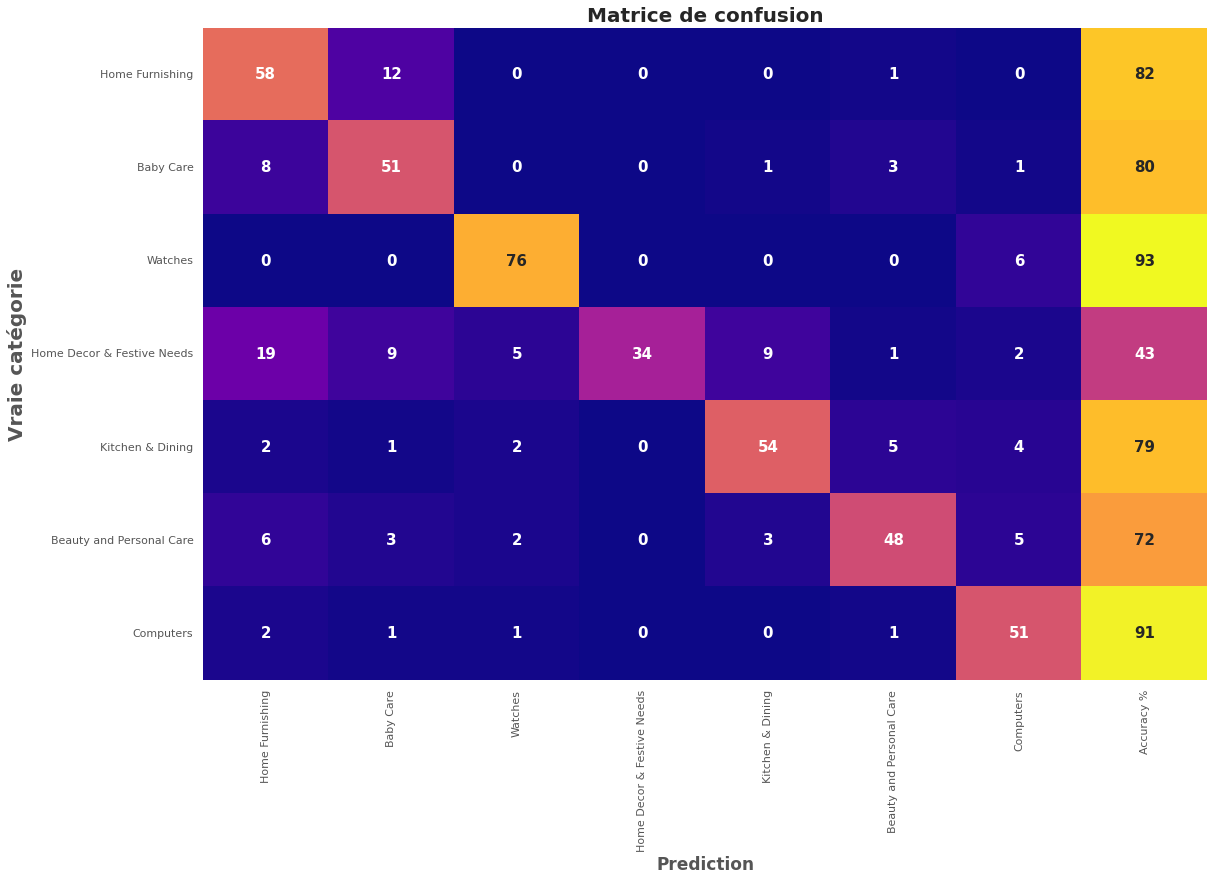

In [ ]:
plt.figure(figsize=(18,12))
plt.title('Matrice de confusion', size=20, weight='bold')
sns.heatmap(df_matrice_confusion,
            xticklabels=True, 
            yticklabels= True, 
            annot=True,
            cmap="plasma", cbar=False,
            annot_kws={"size": 15, 'weight' : 'bold'})
plt.ylabel("Vraie catégorie", weight='bold', size=20)
plt.xlabel('Prediction', weight='bold', size=17)